# Intro a Matplotlib
## Matplotlib = Libreria para graficas cosas matematicas
### Que es Matplotlib?

![alt text](http://matplotlib.org/_static/logo2.png)

Matplotlin es un libreria para crear imagenes 2D de manera facil.

Checate mas en :

* Pagina oficial : http://matplotlib.org/
* Galleria de ejemplo: http://matplotlib.org/gallery.html
* Una libreria mas avanzada que usa matplotlib, Seaborn: http://stanford.edu/~mwaskom/software/seaborn/
* Libreria de visualizacion interactiva: http://bokeh.pydata.org/
* Buenisimo Tutorial: http://www.labri.fr/perso/nrougier/teaching/matplotlib/

Para usar matplotlib, solo tiene que importar el modulo ..tambien te conviene importar numpy pues es muy util

In [2]:
import numpy as np # modulo de computo numerico
import matplotlib.pyplot as plt # modulo de graficas
import pandas as pd # modulo de datos
import seaborn as sns
# esta linea hace que las graficas salgan en el notebook
%matplotlib inline

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Graficas chidas!

In [15]:
def awesome_settings():
    # awesome plot options
    sns.set_style("white")
    sns.set_style("ticks")
    sns.set_context("paper", font_scale=2)
    sns.set_palette(sns.color_palette('bright'))
    # image stuff
    plt.rcParams['figure.figsize'] = (12.0, 6.0)
    plt.rcParams['savefig.dpi'] = 60
    plt.rcParams['lines.linewidth'] = 3

    return

%config InlineBackend.figure_format='retina'
awesome_settings()

# 1 Crear graficas (plt.plot)
## Un ejemplo "complejo"
Crear graficas es muy facil en matplotlib, aqui va un ejemplo complicado..si entiendes este pedazo de codigo puedes entender el resto.

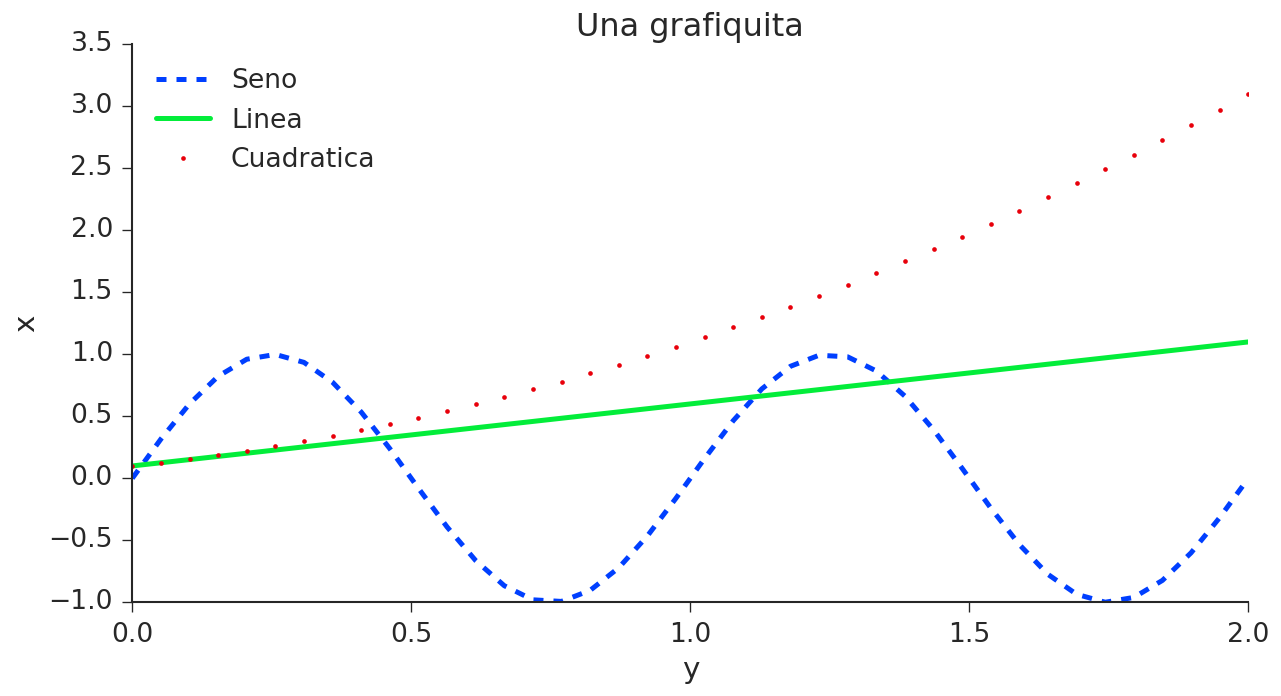

In [18]:
# datos
x = np.linspace(0.0, 2.0, 40)
y1 = np.sin(2*np.pi*x)
y2 = 0.5*x+0.1
y3 = 0.5*x**2+0.5*x+0.1

# a graficas
plt.plot(x,y1,'--',label='Seno')
plt.plot(x,y2,'-',label='Linea')
plt.plot(x,y3,'.',label='Cuadratica')

# estilo
plt.xlabel('y')
plt.ylabel('x')
plt.title('Una grafiquita')
plt.legend(loc='best')
sns.despine()
plt.show()

## Ahora por pedazos

Podemos usar la funcion **np.linspace** para crear valores en un rango, por ejemplo si queremos 100 numeros entre 0 y 10 usamos:

Y podemos graficar dos cosas al mismo tiempo:

Que tal si queremos distinguir cada linea? Pues usamos **legend()**, de leyenda..tambien tenemos que agregarles nombres a cada plot

Tambien podemos hacer mas cosas, como dibujar solamente los puntos, o las lineas con los puntos usando **linestyle**:

## Actividad: Haz muchas graficas

Grafica las siguientes curvas:

* 



Pero ademas podemos meter mas informacion, por ejemplo dar colores cada punto, o darle tamanos diferentes:

# Histogramas (**plt.hist**)

Los histogramas nos muestran distribuciones de datos, la forma de los datos, nos muestran el numero de datos de diferentes tipos:

otro tipo de datos, tomados de una campana de gauss, es decir una distribucion normal:

# Avanzado: (**sns.displot**)

Cambia **plt.hist** por **sns.distplot** y ve la diferencia.

# A graficar el Hermoso Espectro Solar



## Primero constantes numericas

Para usarlo convertimos numeros a unidades, por ejemplo:

`x = 5 * nu.cm` significa "x es igual a 5 centimetros".

si quieres sacar el valor numerico de x, podemos dividir por las unidades

`y = x / nu.mm `, en este caso tenemos el valor numerico en milimetros

In [2]:
import numericalunits as nu

Importamos varios paquetes de Python

In [3]:
import  scipy.interpolate, scipy.integrate, wget, tarfile

Definimos la Celda solar cualquiera a una temperatura de 300 kelvin:

In [ ]:
tCell = 300 * nu.K

## Bajar datos

Aveces los datos que queremos se encuentran en el internet.

Aqui usaremos datos del NREL (National Renewable Energy Laboratory): [http://rredc.nrel.gov/solar/spectra/am1.5/](http://rredc.nrel.gov/solar/spectra/am1.5/)  
del espectro solar  (AM1.5G) con intensity (1000 W/m2). 

Primero lo bajamos y lo descomprimimos:

In [ ]:
data_url = 'http://rredc.nrel.gov/solar/spectra/am1.5/ASTMG173/compressed/ASTMG173.csv.tar'
a_file = wget.download(data_url)
download_as_tarfile_object = tarfile.open(fileobj=a_file)
csv_file = download_as_tarfile_object.extractfile('ASTMG173.csv')

## Que tamanio tienen los datos?

In [4]:
downloaded_array = np.genfromtxt('ASTMG173.csv', delimiter=",", skip_header=2)
downloaded_array.shape

(2002, 4)

## Manipular datos
La columna 0 es la longitud de onda y la 2 es los datos AM1.5G

In [5]:
# Wavelength is in column 0, AM1.5G data is column 2
AM15 = downloaded_array[:,[0,2]]
# The first line should be 280.0 , 4.7309E-23
# The last line should be 4000.0, 7.1043E-03
print(AM15)

[[  2.80000000e+02   4.73090000e-23]
 [  2.80500000e+02   1.23070000e-21]
 [  2.81000000e+02   5.68950000e-21]
 ..., 
 [  3.99000000e+03   7.37230000e-03]
 [  3.99500000e+03   7.21000000e-03]
 [  4.00000000e+03   7.10430000e-03]]


## Vamos a dar unidades a cada columna

In [6]:
AM15[:,0] *= nu.nm
AM15[:,1] *= nu.W * nu.m**-2 * nu.nm**-1

## Limites de los datos

Para los limites de numeros onda ($\lambda$), podemos usar **np.min** y **np.max**.

Para la energia usaremos la formula 
$$
E = \frac{\hbar c_0}{\lambda}
$$

In [ ]:
wavelength_min = 
wavelength_max = 
E_min = nu.hPlanck * nu.c0 
E_max = nu.hPlanck * nu.c0 

## Creamos una funcion, interpolando valores intermedios

In [ ]:
AM15interp = scipy.interpolate.interp1d(AM15[:,0], AM15[:,1])

## Conseguimos los valores x, y

Pista: 

* para **x** podemos usar linspace entre el valor minimo y maximo.
* para **y** creamos una lista y llenamos los datos de la funcion con x

# Tiempo de Graficar